In [4]:
class Node():
    def __init__(self, entry):
        # EOS account name.
        self.identity = entry['identity']
        # Network Stake.
        self.stake = entry['stake']
        # Last emit.
        self.last_emit = entry['last_emit']
        # IP address.
        self.address = entry['address']
        # Port number.
        self.port = entry['port']
        # List of tuples (edge name, edge weight)
        self.edges = entry['edges']
        
    def __repr__(self):
        return self.__str__()

    def __str__(self):
        edge_str = []
        for el in self.edges :
            edge_str.append((el[0], el[1]))
        edge_str = str(edge_str)
        return  "( " + str(self.identity) + " | " + str(self.stake) + " | " + str(self.last_emit)  + ' | ' + edge_str + " )"


In [5]:

import random, string

def random_metagraph(size):

    ids = [''.join(random.choice(string.ascii_lowercase) for x in range(5)) for _ in range(size)]
    edges = []

    for id_i in ids:
        edges_i = []
        weight_sum = random.randint(1, 100)
        edges_i.append((id_i, weight_sum))
        for _ in range(random.randint(0, 5)):
            other_id = random.choice(ids)
            if other_id != id_i:
                weight = random.randint(1, 100)
                weight_sum += weight
                edges_i.append( (other_id, weight) )


            edges_normalized = []
            for edge_tuple in edges_i:
                edges_normalized.append( (edge_tuple[0], edge_tuple[1]/weight_sum) )
            edges.append(edges_normalized)


    b_nodes = []
    for i in range(len(ids)):    

        port = random.randint(0, 10000) + 5000
        n = Node( {'identity': ids[i], 
                   'stake': random.randint(0, 100), 
                   'last_emit': random.randint(0, 100),
                   'address': 'localhost:' + str(port),
                   'port': port,
                   'edges': edges[i]
                  })
        print(n)
        b_nodes.append(n)
    return b_nodes
    


( sgxto | 59 | 78 | [('sgxto', 1.0)] )
( gdmze | 94 | 65 | [('sgxto', 0.7218045112781954), ('dnzgp', 0.2781954887218045)] )
( dnzgp | 42 | 66 | [('gdmze', 0.5802469135802469), ('kugky', 0.41975308641975306)] )
( owrym | 66 | 73 | [('gdmze', 0.5802469135802469), ('kugky', 0.41975308641975306)] )
( kugky | 10 | 6 | [('owrym', 0.6276595744680851), ('dnzgp', 0.3723404255319149)] )


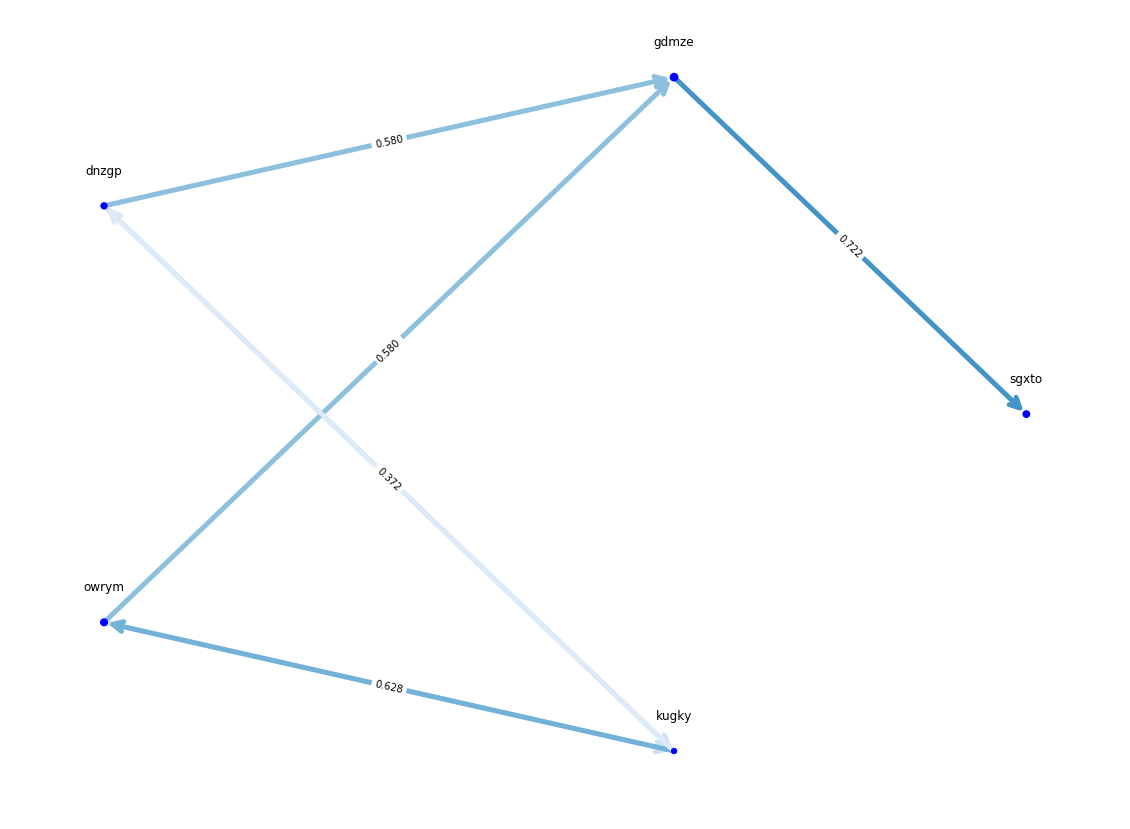

( dcmgo | 24 | 17 | [('dcmgo', 0.39814814814814814), ('ncmzh', 0.6018518518518519)] )
( jjvxt | 35 | 19 | [('dcmgo', 0.2182741116751269), ('ncmzh', 0.3299492385786802), ('iebxr', 0.4517766497461929)] )
( ncmzh | 82 | 52 | [('dcmgo', 0.2182741116751269), ('ncmzh', 0.3299492385786802), ('iebxr', 0.4517766497461929)] )
( cnvat | 98 | 16 | [('dcmgo', 0.1519434628975265), ('ncmzh', 0.22968197879858657), ('iebxr', 0.31448763250883394), ('iebxr', 0.303886925795053)] )
( iebxr | 36 | 94 | [('dcmgo', 0.15087719298245614), ('ncmzh', 0.22807017543859648), ('iebxr', 0.312280701754386), ('iebxr', 0.3017543859649123), ('jjvxt', 0.007017543859649123)] )


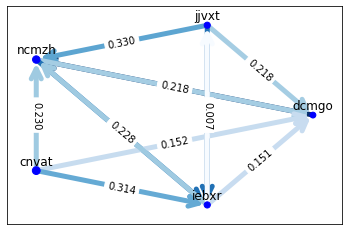

( wtegg | 25 | 87 | [('wtegg', 0.5371428571428571), ('bjmqg', 0.46285714285714286)] )
( bjmqg | 53 | 93 | [('wtegg', 0.5371428571428571), ('bjmqg', 0.46285714285714286)] )
( yfblc | 37 | 37 | [('wtegg', 0.5371428571428571), ('bjmqg', 0.46285714285714286)] )
( nzzgy | 41 | 33 | [('wtegg', 0.34306569343065696), ('bjmqg', 0.2956204379562044), ('bjmqg', 0.3613138686131387)] )
( vevmu | 51 | 63 | [('bjmqg', 0.8181818181818182), ('vevmu', 0.18181818181818182)] )


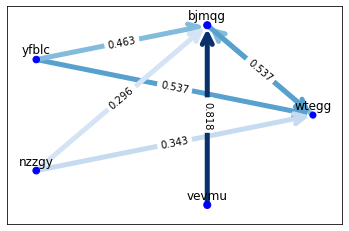

<Figure size 432x288 with 0 Axes>

In [45]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy
import time

fig = plt.figure(figsize=(20,15)) 
ax = plt.gca()

def update():
    ax.clear()
    
    G = nx.DiGraph()
    b_nodes = random_metagraph(5)
    total_stake = sum([node.stake for node in b_nodes])

    node_sizes = []
    node_labels = {}
    for node in b_nodes:
        G.add_node(node.identity)
        node_sizes.append(25 + 100 * (node.stake/total_stake))
        node_labels[node.identity] = str(node.identity)

    edge_colors = {}
    edge_alphas = []
    edge_labels = {}
    i = 0
    for node in b_nodes:
        for edge in node.edges:   
            if (node.identity, edge[0]) not in edge_labels:
                G.add_edge(node.identity,edge[0])
                edge_colors[(node.identity, edge[0])] = edge[1]
                edge_alphas.append(1)
                if node.identity != edge[0]:
                    edge_labels[(node.identity, edge[0])] = "%.3f" % edge[1]
                else:
                    edge_labels[(node.identity, edge[0])] = ""

    for u,v,d in G.edges(data=True):
        d['weight'] = edge_colors[(u,v)]
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    pos = nx.layout.circular_layout(G)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
    edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                                  arrowsize=25, edge_color=weights, edge_cmap=plt.cm.Blues, width=5)

    edge_labels = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, with_labels = True)


    for node in b_nodes:
        pos[node.identity] = pos[node.identity] + numpy.array([0, 0.1])
    labels = nx.draw_networkx_labels(G, pos, node_labels)

    ax.set_axis_off()

#plt.show()
for _ in range(3):
    update()
    plt.draw()
    plt.pause(1)
    plt.clf()
    
#     update()
# #ani = matplotlib.animation.FuncAnimation(fig, update, frames=6, interval=1000, repeat=True)
# plt.show()
# time.sleep(2)
# update()
# plt.show()




In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import matplotlib.animation

# Create Graph
np.random.seed(2)
G = nx.cubical_graph()
G = nx.relabel_nodes(G, {0:"O", 1:"X", 2:"XZ", 3:"Z", 4:"Y", 5:"YZ", 6: "XYZ", 7:"XY"})
pos = nx.spring_layout(G)

# Sequence of letters
sequence_of_letters = "".join(['X', 'Y', 'Z', 'Y', 'Y', 'Z'])
idx_colors = sns.cubehelix_palette(5, start=.5, rot=-.75)[::-1]
idx_weights = [3,2,1]

# Build plot
fig, ax = plt.subplots(figsize=(6,4))


def update(num):
    ax.clear()
    i = num // 3
    j = num % 3 + 1
    triad = sequence_of_letters[i:i+3]
    path = ["O"] + ["".join(sorted(set(triad[:k + 1]))) for k in range(j)]

    # Background nodes
    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="gray")
    null_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=set(G.nodes()) - set(path), node_color="white",  ax=ax)
    null_nodes.set_edgecolor("black")

    # Query nodes
    query_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=path, node_color=idx_colors[:len(path)], ax=ax)
    query_nodes.set_edgecolor("white")
    nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)
    edgelist = [path[k:k+2] for k in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos=pos, edgelist=edgelist, width=idx_weights[:len(path)], ax=ax)

    # Scale plot ax
    ax.set_title("Frame %d:    "%(num+1) +  " - ".join(path), fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])


ani = matplotlib.animation.FuncAnimation(fig, update, frames=6, interval=1000, repeat=True)
plt.show()


/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verb

<Figure size 600x400 with 1 Axes>